c:\Users\Manchee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Manchee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

K-Fold Cross-Validation Accuracy: 78.63%
Test Accuracy: 81.25%
                                                                    precision    recall  f1-score   support

                                                       Antibiotics       0.87      0.88      0.87       618
Antidiarrheals, intestinal anti-inflammatory/anti-infective agents       0.47      0.53      0.50       150
                                                    Antihistamines       1.00      0.60      0.75       230
                                                   Antidepressants       0.67      0.97      0.80       324
                                                     Psycholeptics       1.00      0.97      0.99       180
                                       Pain Relievers (Analgesics)       1.00      0.67      0.80       231

                                                          accuracy                           0.81      1733
                                                         macro avg     

c:\Users\Manchee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


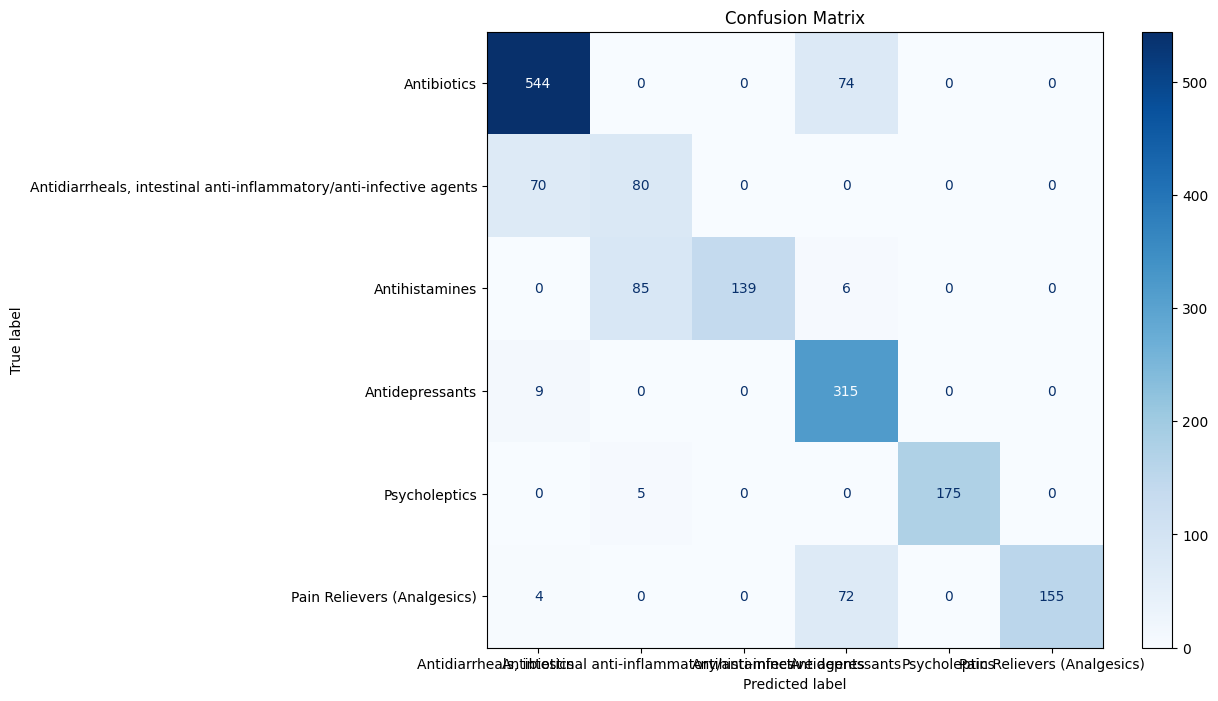

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
modified_dataset = pd.read_csv(r'C:\src\pedimed\lib\data\Modified_dataset.csv')
category_label = pd.read_csv(r'C:\src\pedimed\lib\data\category_label.csv')
unit_label = pd.read_csv(r'C:\src\pedimed\lib\data\unit_label.csv')

# Prepare the data
X = modified_dataset.drop(columns=['Unnamed: 0', 'Brand_Names', 'Category', 'Category_Label', 'Dosage_Unit'])
y = modified_dataset['Category_Label']

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

# Calculate accuracy using K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(clf, X_pca, y, cv=kf)
print(f"K-Fold Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}%")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred, target_names=category_label['Category'], zero_division=1))

# Sample input for prediction
sample_input = {
    'Dosage': 120.0,
    'Dosage Frequency': 3,
    'Dosage_Unit_Label': 1,
    'Drug_Name_Amoxicillin': 0,
    'Drug_Name_Atomoxetine': 0,
    'Drug_Name_Azithromycin': 0,
    'Drug_Name_Budesonide': 0,
    'Drug_Name_Cefixime': 0,
    'Drug_Name_Cephalexin': 0,
    'Drug_Name_Clarithromycin': 0,
    'Drug_Name_Clotrimazole': 0,
    'Drug_Name_Codeine': 0,
    'Drug_Name_Dexamethasone': 0,
    'Drug_Name_Diclofenac': 0,
    'Drug_Name_Doxycycline': 0,
    'Drug_Name_Erythromycin': 0,
    'Drug_Name_Fluconazole': 0,
    'Drug_Name_Ibuprofen': 0,
    'Drug_Name_Loratadine': 0,
    'Drug_Name_Metronidazole': 0,
    'Drug_Name_Mometasone': 0,
    'Drug_Name_Paracetamol': 1,
    'Drug_Name_Prednisolone': 0,
    'Drug_Name_Ranitidine': 0,
    'Drug_Name_Salmeterol': 0,
    'Drug_Name_Sulfamethoxazole/Trimethoprim': 0,
    'Drug_Name_Tobramycin': 0,
    'Drug_Name_Vancomycin': 0,
    'Formulation_Capsule': 0,
    'Formulation_Eyedrop': 0,
    'Formulation_Liquid': 1,
    'Formulation_Others': 0,
    'Formulation_Tablet': 0
}

# Ensure all necessary columns are included in the sample input
sample_df = pd.DataFrame([sample_input])
sample_df = sample_df.reindex(columns=modified_dataset.drop(columns=['Unnamed: 0', 'Brand_Names', 'Category', 'Category_Label', 'Dosage_Unit']).columns, fill_value=0)

# Transform the sample input using PCA
sample_df_pca = pca.transform(sample_df)

# Predict category and confidence for the sample input
sample_pred = clf.predict(sample_df_pca)
sample_pred_prob = clf.predict_proba(sample_df_pca)

# Get the category name
category_name = category_label[category_label['Category_Label'] == sample_pred[0]]['Category'].values[0]
confidence = sample_pred_prob[0][sample_pred[0]]

print(f"Sample prediction:")
print(f"Category: {category_name}")
print(f"Confidence: {confidence * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using sklearn's ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category_label['Category'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()
